In [1]:
import numpy as np
from __future__ import division

## Load the Data and print out the first row to see the shape

The 6th entry in each row is the label (0 = no error, 1 = error)

In [2]:
ErrorData = np.genfromtxt('error-data-10.csv', delimiter=',')

In [3]:
ErrorData[0,:]

array([  4.46711483e-04,   8.86926596e-02,   3.90407089e-01,
         1.30862639e-02,   2.54369212e-04,   1.20852433e-05,
         1.00000000e+00])

## Check the error rate and print some statistics about the data

In [4]:
np.mean(ErrorData[:,6])

0.46229999999999999

In [5]:
print "No error: %d"%(len(filter(lambda x: x[6] == 0.0, ErrorData)))
print "Error: %d"%(len(filter(lambda x: x[6] == 1.0, ErrorData)))

No error: 5377
Error: 4623


# Split the data into training, development, and evaluation set

Ordinarily this would be done randomly but the data is synthetic and was generated randomly thus any selection from the data is random.

In [6]:
X_t = ErrorData[:6000,:6]
y_t = ErrorData[:6000,6]
X_dev = ErrorData[6000:8000,:6]
y_dev = ErrorData[6000:8000,6]
X_val = ErrorData[8000:,:6]
y_val = ErrorData[8000:,6]

## Train a classifier with the default parameters

Serialize the classifier.

*At first the default parameters were used and some statistics about the fit are printed. This turned out to be such a good fit that tuning was unnecessary. Decision tree was chosen to easily create constraints for future simulations. Other models might be better suited.*

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pickle

In [8]:
clf=DecisionTreeClassifier()
clf.fit(X_t, y_t)
print "Accuracy: %f"%(sum(clf.predict(X_val) == y_val) / len(y_val))
mat = confusion_matrix(clf.predict(X_val), y_val)
print "Confusion Matrix: \n %s"%(mat)

# precision
precision = [mat[i, i] / sum(mat[:, i]) for i in range(0, 2)]
print "Precision: %s"%(precision)
print "Mean Precision %f"%(np.mean(precision))

# recall
recall = [mat[i, i] / sum(mat[i, :]) for i in range(0, 2)]
print "Recall: %s"%(recall)
print "Mean Recall: %f"%(np.mean(recall))

# F1
fOne = [(2 * precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(0, len(precision))]
print "F1 Score: %s"%(fOne)
print "Mean F1 Score: %f"%(np.mean(fOne))

Accuracy: 0.998500
Confusion Matrix: 
 [[1048    1]
 [   2  949]]
Precision: [0.99809523809523815, 0.99894736842105258]
Mean Precision 0.998521
Recall: [0.99904671115347954, 0.9978969505783386]
Mean Recall: 0.998472
F1 Score: [0.99857074797522627, 0.99842188321935821]
Mean F1 Score: 0.998496


In [9]:
pickle.dump(clf, open('error-classifier.pickle', 'w'))

## Plot Features and Labels

Generate plots for each feature, plotting them in pairs. Point colors are labels. These provide an intuitive sense of the data.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [11]:
def colormap(x):
    if x == 0:
        return 'g'
    else:
        return 'r'

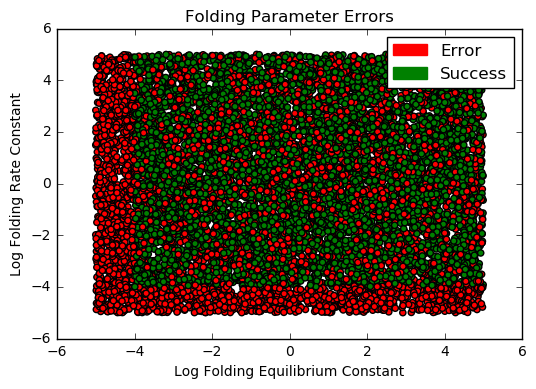

In [12]:
plt.scatter((np.log10(ErrorData[:, 0])), np.log10(ErrorData[:, 1]), c=map(colormap, ErrorData[:, 6]))
plt.ylabel('Log Folding Rate Constant')
plt.xlabel('Log Folding Equilibrium Constant')
plt.title('Folding Parameter Errors')
red_patch = mpatches.Patch(color='red', label='Error')
green_patch = mpatches.Patch(color='green', label='Success')
plt.legend(handles=[red_patch, green_patch])
plt.show()

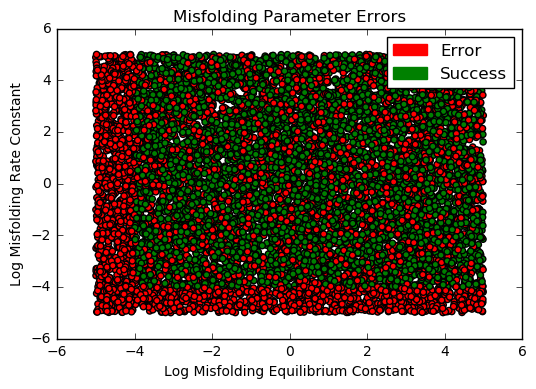

In [13]:
plt.scatter((np.log10(ErrorData[:, 2])), np.log10(ErrorData[:, 3]), c=map(colormap, ErrorData[:, 6]))
plt.ylabel('Log Misfolding Rate Constant')
plt.xlabel('Log Misfolding Equilibrium Constant')
plt.title('Misfolding Parameter Errors')
red_patch = mpatches.Patch(color='red', label='Error')
green_patch = mpatches.Patch(color='green', label='Success')
plt.legend(handles=[red_patch, green_patch])
plt.show()

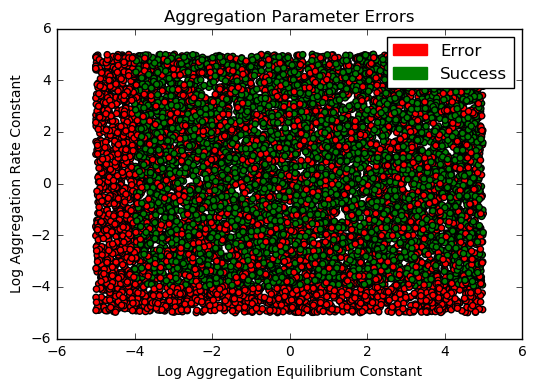

In [14]:
plt.scatter((np.log10(ErrorData[:, 4])), np.log10(ErrorData[:, 5]), c=map(colormap, ErrorData[:, 6]))
plt.ylabel('Log Aggregation Rate Constant')
plt.xlabel('Log Aggregation Equilibrium Constant')
plt.title('Aggregation Parameter Errors')
red_patch = mpatches.Patch(color='red', label='Error')
green_patch = mpatches.Patch(color='green', label='Success')
plt.legend(handles=[red_patch, green_patch])
plt.show()

## Visual Analysis

*From visual analysis it was trivial to see that there was a simple cutoff at around -4. To be sure these plots were made again with points that had a single feature below -4 filtered out.*

In [15]:
filteredErrorData = np.array(filter(lambda x: np.min(x[:6]) > 1e-4, ErrorData))

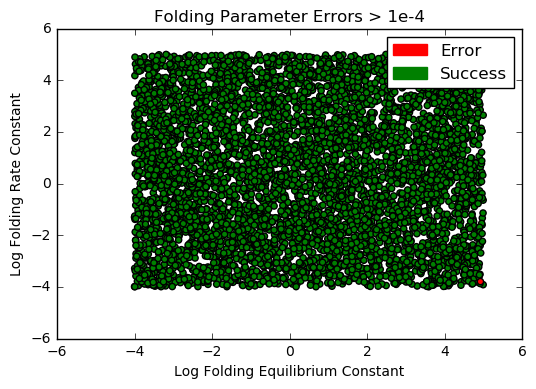

In [16]:
plt.scatter((np.log10(filteredErrorData[:, 0])), np.log10(filteredErrorData[:, 1]), c=map(colormap, filteredErrorData[:, 6]))
plt.ylabel('Log Folding Rate Constant')
plt.xlabel('Log Folding Equilibrium Constant')
plt.title('Folding Parameter Errors > 1e-4')
red_patch = mpatches.Patch(color='red', label='Error')
green_patch = mpatches.Patch(color='green', label='Success')
plt.legend(handles=[red_patch, green_patch])
plt.show()

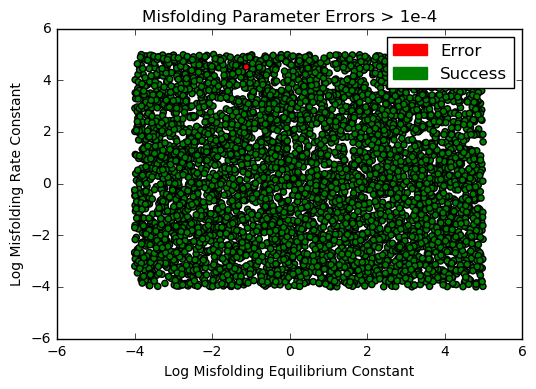

In [17]:
plt.scatter((np.log10(filteredErrorData[:, 2])), np.log10(filteredErrorData[:, 3]), c=map(colormap, filteredErrorData[:, 6]))
plt.ylabel('Log Misfolding Rate Constant')
plt.xlabel('Log Misfolding Equilibrium Constant')
plt.title('Misfolding Parameter Errors > 1e-4')
red_patch = mpatches.Patch(color='red', label='Error')
green_patch = mpatches.Patch(color='green', label='Success')
plt.legend(handles=[red_patch, green_patch])
plt.show()

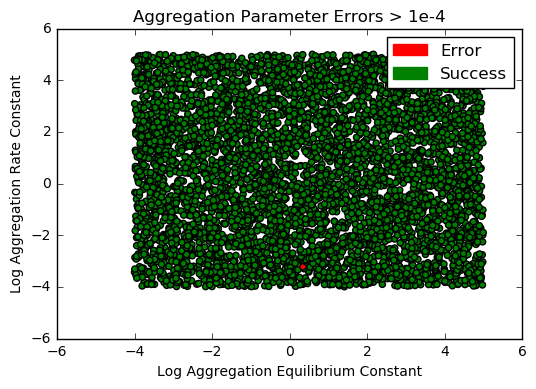

In [18]:
plt.scatter((np.log10(filteredErrorData[:, 4])), np.log10(filteredErrorData[:, 5]), c=map(colormap, filteredErrorData[:, 6]))
plt.ylabel('Log Aggregation Rate Constant')
plt.xlabel('Log Aggregation Equilibrium Constant')
plt.title('Aggregation Parameter Errors > 1e-4')
red_patch = mpatches.Patch(color='red', label='Error')
green_patch = mpatches.Patch(color='green', label='Success')
plt.legend(handles=[red_patch, green_patch])
plt.show()

## Check compliment for non-error points to ensure none were missed

In [19]:
filteredErrorData_compliment = np.array(filter(lambda x: np.min(x[:6]) <= 1e-4, ErrorData))

In [20]:
np.mean(filteredErrorData_compliment[:,6])

1.0

## Conclusion

*The -4 cutoff is very effective at classifying errors. It never misclassifies a non-error as an error, and is nearly perfect at identifying non-error points. This means the classifier isn't necessary but it explains the high performance of the decision tree.* 